# Proyecto final de python de la asignatura investigación operativa

En una localidad de segovia llamada Coca (Mi pueblo) existe una fábrica de distintos tipos de vehículos. Los vehiculos fabricados son 6 distintos; Triciclos a motor, Bicicletas con motor, Patinetes electricos , quads, motocicletas y bicicletas estándar. Lo máximo que puede producir la fabrica al mes es de 1000 unidades. Al mes no se pueden producir mas de 600 unidades entre Bicicletas con motor, tricilos a motor y Bicicletas estándar. Tampoco se pueden producir mas de 350 unidades entre quads y motocicletas. Se deben producir al menos 200 unidades entre patinetes eléctricos y bicicletas estándar. Se deben producir mas de 100 bicicletas a motor y menos de 450 triciclos a motor.
Sabiendo que cada producto tiene el siguiente precio de venta: 
- Triciclos a motor: 2000€
- Bicicletas con motor: 1500€
- Patinetes eléctricos: 1000€
- Quads: 3000€
- Motocicletas: 2500€
- Bicicletas estándar: 500€

El objetivo de este problema es maximizar el beneficio de la fabrica teniendo en cuenta las restricciones que se han mencionado.


Maximizar:  
$$ 
Z = 2000X_1 + 1500X_2 + 1000X_3 + 3000X_4 + 2500X_5 + 500X_6 
$$

Sujeto a las siguientes restricciones:  
$$
\begin{aligned}
    X_1 + X_2 + X_3 + X_4 + X_5 + X_6 &\leq 1000 \\
    X_1 + X_2 + X_6 &\leq 600 \\
    X_4 + X_5 &\leq 350 \\
    X_3 + X_6  &\geq 200 \\
    X_1 &\geq 100 \\
    X_3 &\leq 450 \\
    X_1, X_2, X_3, X_4, X_5, X_6 &\geq 0
\end{aligned}
$$


## Resolución del problema mediante pyomo

In [1]:
from pyomo.environ import *

# Crear el modelo
model = ConcreteModel()

# Definir las variables
model.x1 = Var(within=NonNegativeReals)  # Triciclos a motor
model.x2 = Var(within=NonNegativeReals)  # Bicicletas con motor
model.x3 = Var(within=NonNegativeReals)  # Patinetes eléctricos
model.x4 = Var(within=NonNegativeReals)  # Quads
model.x5 = Var(within=NonNegativeReals)  # Motocicletas
model.x6 = Var(within=NonNegativeReals)  # Bicicletas estándar

# Definir la función objetivo
model.obj = Objective(
    expr=2000*model.x1 + 1500*model.x2 + 1000*model.x3 + 3000*model.x4 + 2500*model.x5 + 500*model.x6, 
    sense=maximize
)


# Definir las restricciones
model.constraint1 = Constraint(expr=model.x1 + model.x2 + model.x3 + model.x4 + model.x5 + model.x6 <= 1000)
model.constraint2 = Constraint(expr=model.x1 + model.x2 + model.x6 <= 600)
model.constraint3 = Constraint(expr=model.x4 + model.x5 <= 350)
model.constraint4 = Constraint(expr=model.x3 + model.x6 >= 200)
model.constraint5 = Constraint(expr=model.x2 >= 100)  # Bicicletas con motor
model.constraint6 = Constraint(expr=model.x1 <= 450)  # Triciclos a motor

# Resolver el problema
solver = SolverFactory('glpk')
solver.solve(model)

# Mostrar los resultados
print("\nResultados:")
print(f"Triciclos a motor (x1): {model.x1.value}")
print(f"Bicicletas con motor (x2): {model.x2.value}")
print(f"Patinetes eléctricos (x3): {model.x3.value}")
print(f"Quads (x4): {model.x4.value}")
print(f"Motocicletas (x5): {model.x5.value}")
print(f"Bicicletas estándar (x6): {model.x6.value}")
print(f"Beneficio total: {model.obj()} €")



Resultados:
Triciclos a motor (x1): 350.0
Bicicletas con motor (x2): 100.0
Patinetes eléctricos (x3): 200.0
Quads (x4): 350.0
Motocicletas (x5): 0.0
Bicicletas estándar (x6): 0.0
Beneficio total: 2100000.0 €


La solucion a nuestro problema seria fabricar 350 vehículos a motor, 100 bicicletas con motor, 200 patinetes electricos 350 quads, 0 motocicletas y 0 bicicletas estándard. Siendo el beneficio total de 2.100.000 euros al mes.

## Ánalisis de sensibilidad 
A continuación haremos un pequeño analisis de sensibilidad variando algunos datos asi como el precio de venta o incluso añadiendo alguna restricciones o quitandolas para que asi el numero de piezas a fabricar de las motociletas y de las bicicletas estandar sea ditinto de 0 


In [9]:
from pyomo.environ import *

# Crear el modelo
model = ConcreteModel()

# Definir las variables
model.x1 = Var(within=NonNegativeReals)  # Triciclos a motor
model.x2 = Var(within=NonNegativeReals)  # Bicicletas con motor
model.x3 = Var(within=NonNegativeReals)  # Patinetes eléctricos
model.x4 = Var(within=NonNegativeReals)  # Quads
model.x5 = Var(within=NonNegativeReals)  # Motocicletas
model.x6 = Var(within=NonNegativeReals)  # Bicicletas estándar

# Ajustar los precios en la función objetivo para incluir todos los productos
model.obj = Objective(
    expr=2500*model.x1 + 1600*model.x2 + 1200*model.x3 + 5000*model.x4 + 6000*model.x5 + 2000*model.x6, 
    sense=maximize
)

# Definir las restricciones
model.constraint1 = Constraint(expr=model.x1 + model.x2 + model.x3 + model.x4 + model.x5 + model.x6 <= 1000)
model.constraint2 = Constraint(expr=model.x1 + model.x2 + model.x6 <= 600)
model.constraint3 = Constraint(expr=model.x4 + model.x5 <= 350)
model.constraint4 = Constraint(expr=model.x3 + model.x6 >= 200)
model.constraint5 = Constraint(expr=model.x2 >= 100)  # Bicicletas con motor
model.constraint6 = Constraint(expr=model.x1 <= 450)  # Triciclos a motor

# Resolver el problema
solver = SolverFactory('glpk')
solver.solve(model)

# Mostrar los resultados
print("\nResultados:")
print(f"Triciclos a motor (x1): {model.x1.value}")
print(f"Bicicletas con motor (x2): {model.x2.value}")
print(f"Patinetes eléctricos (x3): {model.x3.value}")
print(f"Quads (x4): {model.x4.value}")
print(f"Motocicletas (x5): {model.x5.value}")
print(f"Bicicletas estándar (x6): {model.x6.value}")
print(f"Beneficio total: {model.obj()} €")



Resultados:
Triciclos a motor (x1): 350.0
Bicicletas con motor (x2): 100.0
Patinetes eléctricos (x3): 50.0
Quads (x4): 0.0
Motocicletas (x5): 350.0
Bicicletas estándar (x6): 150.0
Beneficio total: 3495000.0 €


# Problema dual 
A continuacion resolveremos el problema dual y haremos un analisis de los resultados 

Antes de crear el problema dual y de ahi resolverlo, deberemos preparar bien el problema primal; 

Maximizar:  
$$ 
Z = 2000X_1 + 1500X_2 + 1000X_3 + 3000X_4 + 2500X_5 + 500X_6
$$

Sujeto a las siguientes restricciones:  
$$
\begin{aligned}
    X_1 + X_2 + X_3 + X_4 + X_5 + X_6 + X_7 &= 1000 \quad (1) \\
    X_1 + X_2 + X_6 + X_8 &= 600 \quad (2) \\
    X_4 + X_5 + X_9 &= 350 \quad (3) \\
    X_3 + X_6 - x_{10} &= 200 \quad (4) \\
    X_1 - X_{11} &= 100 \quad (5) \\
    X_3 + X_{12} &= 450 \quad (6) \\
    X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_{10}, X_{11}, X_{12} &\geq 0
\end{aligned}
$$














Luego una vez reescrito el problema primal de esta forma, ya podriamos crear el problema dual


Minimizar:  
$$
W = 1000Y_1 + 600Y_2 + 350Y_3 + 200Y_4 + 100Y_5 + 450Y_6
$$

Sujeto a:
$$
\begin{aligned}
    Y_1 + Y_2 + Y_5 &\geq 2000 \\
    Y_1 + Y_2 &\geq 1500 \\
    Y_1 + Y_4 + Y_6 &\geq 1000 \\
    Y_1 + Y_3 &\geq 3000 \\
    Y_1 + Y_3 &\geq 2500 \\
    Y_1 + Y_2 + Y_4 &\geq 500
\end{aligned}
$$

Con:
$$
Y_1, Y_2, Y_3, Y_4, Y_5, Y_6 \geq 0
$$

A continuación resolveremos el problema mediante pyomo y analizaremos los resultados.

In [1]:
from pyomo.environ import *

# Crear el modelo
model = ConcreteModel()

# Definir las variables
model.Y1 = Var(domain=NonNegativeReals)
model.Y2 = Var(domain=NonNegativeReals)
model.Y3 = Var(domain=NonNegativeReals)
model.Y4 = Var(domain=NonNegativeReals)
model.Y5 = Var(domain=NonNegativeReals)
model.Y6 = Var(domain=NonNegativeReals)

# Función objetivo: Minimizar W
model.objective = Objective(
    expr=1000 * model.Y1 + 600 * model.Y2 + 350 * model.Y3 +
         200 * model.Y4 + 100 * model.Y5 + 450 * model.Y6,
    sense=minimize
)

# Restricciones
model.constraint1 = Constraint(expr=model.Y1 + model.Y2 + model.Y5 >= 2000)
model.constraint2 = Constraint(expr=model.Y1 + model.Y2 >= 1500)
model.constraint3 = Constraint(expr=model.Y1 + model.Y4 + model.Y6 >= 1000)
model.constraint4 = Constraint(expr=model.Y1 + model.Y3 >= 3000)
model.constraint5 = Constraint(expr=model.Y1 + model.Y3 >= 2500)
model.constraint6 = Constraint(expr=model.Y1 + model.Y2 + model.Y4 >= 500)

# Resolver el modelo
solver = SolverFactory('glpk')
solver.solve(model)

# Mostrar resultados
print("Resultados:")
print(f"Y1 = {model.Y1.value}")
print(f"Y2 = {model.Y2.value}")
print(f"Y3 = {model.Y3.value}")
print(f"Y4 = {model.Y4.value}")
print(f"Y5 = {model.Y5.value}")
print(f"Y6 = {model.Y6.value}")
print(f"Valor óptimo de W = {model.objective()}")



Resultados:
Y1 = 1000.0
Y2 = 500.0
Y3 = 2000.0
Y4 = 0.0
Y5 = 500.0
Y6 = 0.0
Valor óptimo de W = 2050000.0


## Relacion e interpretación entre el problema dual y el problema primal 
- Primero; Que busca cada problema 
El objetivo del problema primal es maximizar el beneficio de la fabrica teniendo en cuenta el precio de venta y respetando las restricciones establecidas. Minetras que el objetivo del problema dual o mas bien lo que expresa el problema dual es como aumentarian los beneficios de la fabrica si se aumenta el valor asociado a Yi

- ¿Cual es la interpretacion de las variables del problema dual?
Tenemos los siguientes resultados al resolver el problema dual:
Y1 = 1000
Y2 = 500
Y3 = 2000
Y4 = 0.
Y5 = 500
Y6 = 0
Valor óptimo de W = 2.050.000

Para la varibale Y1; Esta variable esta asociada a la primera restriccion donde la producción total tiene un maximo de 1000 productos al mes, entonces el resultado del problema dual nos dice que por cada unidad que aumentemos, el beneficio aumentari 1000€ es decir que si en vez de ser 1000 productos al mes se produjera 1001, el beneficio aumentaria en 1000€. Para la variable Y2; Es la variable que esta asociada a que solo se pueden fabricar 600 productos entre la suma de  bicicletas con motor, triciclos, y bicicletas estándar al mes, por tanto viendo el resultado del problema dual tenemos que al aumentar una unidad del maximo posible a fabricar, el beneficio aumentaria 500€. Para la variable Y3; Es la variable qasociada al limite de 350 productos totales entre quads y motocicletas donde vemos que es donde mayor beneficio vamos a sacar si aumentamos una unidad a su restriccion de solo 350 productos, sindo este beneficio de 2000€. Para la variable Y5; Variable asociada a que se deben producir al menos 100 bicicletas con motor tenemos que su beneficio al ampliar una unidad la restriccion es de 500€. Para las variables Y4 e Y6 tenemos que son variables no activas, ¿esto que significa? pues de manera "técnica" significa que al relajarlas, no afectaran al beneficio y nos damos cuenta de que este recurso no esta suficientemente aprovechado. Resumiendo de forma mas vulgar, hay una gran diferencia entre la cantidad disponible y la cantidad utilizada. Y como es obvio, como las 2 variables dichas antes son 0, no nos afectan al beneficio.

- Valor optimo de el primar y el dual y su comparación.
Sabiendo que el valor optimo del primal es 2.100.000€ mientras que el valor optimo del dual es de 2.050.000€. Luego si vemos la diferencia de los resultado nos sale 50.000€ 
#### Mirar a ver aqui que significa esto de arriba de e valor optimo

- Conclusión
Las variables duales nos permiten identificar cuales son las restricciones que mas nos afectan y que mas beneficio podemos sacar. Vemos que la que mas beneficio nos da seria la que limita a un maximo de 350 unidades de quads y motocicletas, con un beneficio de 2000€ por unidad aumentada. También podemos leer que ay algunas restricciones que nos interesa variar porque tenemos beneficios como Y1 o Y3 que nos dan un beneficio de 1000€ por unidad aumentada y hay otras que no nos aporta ningun beneficio como Y4 e Y6 y podrian ser menos prioritarias en la planificaión.


# Resolucion del problema mediante el metodo grafico
Un tiempo mas tarde esta fabrica se da cuenta de que es preferible fabricar únicamente 2 productos y sacarle la maxima rentabilidad, entonces decide comenzar a fabricar solamente triciclos a motor y bicicletas con motor. Se debe tener en cuenta que debe haber una serie de requistos que por ley o por motivos de la empresa se deben respetar que son; al mes solo es posible fabricar un total de 600 productos, se deben fabricar al menos 120 triciclos a motor y como mucho puede fabricar 400 bicicletas con motor. Por último hay que tener en cuenta que el beneficio de un triciclo a motor es de 2000€ y el de una bicicleta con motor es de 1500€. ¿Cuántos triciclos a motor y bicicletas con motor se deben fabricar para maximizar los beneficios?

Maximizar:  
$$ 
Z = 2000X_1 + 1500X_2  
$$

Sujeto a las siguientes restricciones:  
$$
\begin{aligned}
    X_1 + X_2  &\leq 600 \\
    X_2 &\leq 400 \\
    X_1  &\geq 120 \\
    X_1, X_2 &\geq 0
\end{aligned}
$$


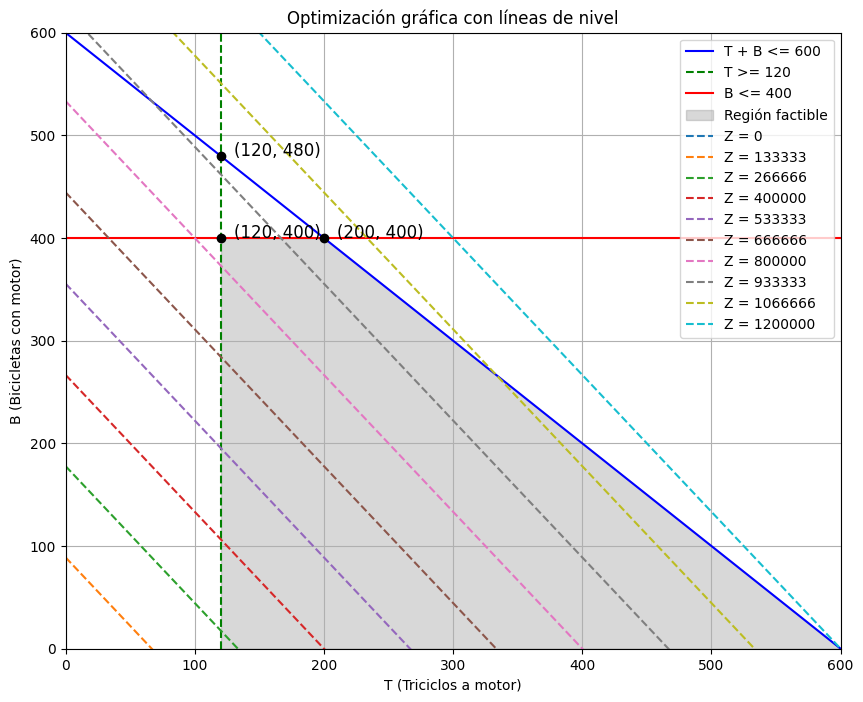

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las restricciones
def restricciones():
    # Restricción 1: T + B <= 600
    x = np.linspace(0, 600, 500)
    y1 = 600 - x
    
    # Restricción 2: T >= 120
    y2 = np.full_like(x, np.inf)
    y2[x >= 120] = 0  # Límite en T = 120
    
    # Restricción 3: B <= 400
    y3 = np.full_like(x, 400)
    
    return x, y1, y2, y3

# Definir la función objetivo
def funcion_objetivo(x, z):
    return (z - 2000 * x) / 1500

# Configurar el gráfico
x, y1, y2, y3 = restricciones()
plt.figure(figsize=(10, 8))

# Dibujar restricciones
plt.plot(x, y1, label='T + B <= 600', color='blue')
plt.axvline(x=120, label='T >= 120', color='green', linestyle='--')
plt.plot(x, y3, label='B <= 400', color='red')

# Sombrear la región factible
y_lim = np.minimum(np.minimum(y1, y3), 600 - x)
plt.fill_between(x, 0, y_lim, where=(x >= 120), color='gray', alpha=0.3, label='Región factible')

# Dibujar líneas de nivel de la función objetivo
niveles = np.linspace(0, 1_200_000, 10)  # Crear 10 niveles de Z
for z in niveles:
    y_obj = funcion_objetivo(x, z)
    plt.plot(x, y_obj, linestyle='--', label=f'Z = {int(z)}')

# Puntos de intersección
puntos_interseccion = [(120, 480), (120, 400), (200, 400)]
for punto in puntos_interseccion:
    plt.plot(punto[0], punto[1], 'ko')  # Puntos de intersección en color negro
    plt.text(punto[0] + 10, punto[1], f'({punto[0]}, {punto[1]})', fontsize=12, color='black')

# Agregar etiquetas y leyenda
plt.title('Optimización gráfica con líneas de nivel')
plt.xlabel('T (Triciclos a motor)')
plt.ylabel('B (Bicicletas con motor)')
plt.xlim(0, 600)
plt.ylim(0, 600)
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


Al ver este grafico, observamos varias cosas, vamos a analizarlas poco a poco para llegar al resultado final. Primero vemos cual es la region factible, esta region es la que esta dentro de los 4 vertices dados en los puntos; A=(120,400), B= (120,0), C=(600,0) y D= (200,400). Ya sabemos cual es la region factible y los puntos que la hacen, ahora debemos ver cuales son las lineas de nivel (las que son discontinuas) y vemos cual es la mas lejana y que pase por uno de los puntos que tenemos delimitando la región factible. Aplicando todo esto, vemos que seria en el punto (600,0) esto signifiva que el beneficio maximo se obtendría fabricando 600 triciclos a motor y 0 bicicletas con motor.

In [14]:
from pyomo.environ import *

# Crear el modelo
model = ConcreteModel()

# Definir las variables continuas no negativas
model.x1 = Var(domain=NonNegativeReals)
model.x2 = Var(domain=NonNegativeReals)

# Definir la función objetivo
model.obj = Objective(expr=model.x1 - 2*model.x2, sense=minimize)

# Definir las restricciones
model.constraint1 = Constraint(expr=2*model.x1 + model.x2 <= 5)
model.constraint2 = Constraint(expr=-4*model.x1 + 4*model.x2 <= 5)
model.constraint2 = Constraint(expr=model.x2 >= 3)


# Resolver el modelo
solver = SolverFactory('glpk')  # Usar el solver GLPK
result = solver.solve(model)

# Mostrar resultados
print("Estado:", result.solver.status)
print("Resultado:", result.solver.termination_condition)

# Mostrar valores óptimos de las variables
print(f"x1: {model.x1.value}")
print(f"x2: {model.x2.value}")

# Mostrar el valor óptimo de la función objetivo
print(f"Valor óptimo de la función objetivo: {model.obj()}")


'pyomo.core.base.constraint.ScalarConstraint'>) on block unknown with a new
Component (type=<class
'pyomo.core.base.constraint.AbstractScalarConstraint'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
Estado: ok
Resultado: optimal
x1: 0.0
x2: 5.0
Valor óptimo de la función objetivo: -10.0
